In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [30]:
listings = pd.read_excel('datasets/listings.xlsx', na_values='n/a')
listings.head()

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,XXII,"22nd Century Group, Inc",1.3300,1.206285e+08,NaN,Consumer Non-Durables,Farming/Seeds/Milling
1,FAX,Aberdeen Asia-Pacific Income Fund Inc,5.0000,1.266333e+09,1986.0,NaN,NaN
2,IAF,Aberdeen Australia Equity Fund Inc,6.1500,1.398653e+08,NaN,NaN,NaN
3,CH,"Aberdeen Chile Fund, Inc.",7.2201,6.756346e+07,NaN,NaN,NaN
4,ABE,Aberdeen Emerging Markets Smaller Company Oppo...,13.3600,1.288430e+08,NaN,NaN,NaN


In [31]:
print(listings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           360 non-null    object 
 1   Company Name           360 non-null    object 
 2   Last Sale              346 non-null    float64
 3   Market Capitalization  360 non-null    float64
 4   IPO Year               105 non-null    float64
 5   Sector                 238 non-null    object 
 6   Industry               238 non-null    object 
dtypes: float64(3), object(4)
memory usage: 19.8+ KB
None


In [32]:
listings.set_index('Stock Symbol', inplace=True)

In [33]:
listings.dropna(subset=['Sector'], inplace=True)

In [34]:
listings = listings[listings['IPO Year'] < 2019]

In [35]:
listings.head()

,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
Stock Symbol,,,,,,
ACU,Acme United Corporation.,27.3900,9.113899e+07,1988.0,Capital Goods,Industrial Machinery/Components
AAU,"Almaden Minerals, Ltd.",1.7200,1.548917e+08,2015.0,Basic Industries,Precious Metals
USAS,Americas Silver Corporation,3.0500,1.206948e+08,2017.0,Basic Industries,Precious Metals
AINC,Ashford Inc.,57.3373,1.155508e+08,2014.0,Consumer Services,Professional Services
AUXO,"Auxilio, Inc.",6.3043,5.913104e+07,2017.0,Miscellaneous,Business Services


In [8]:
print(listings.groupby(['Sector']).size().sort_values(ascending=False))

Sector
Health Care              11
Consumer Services         9
Basic Industries          8
Capital Goods             5
Technology                4
Public Utilities          3
Energy                    2
Miscellaneous             1
Finance                   1
Consumer Non-Durables     1
dtype: int64


In [9]:
component = listings.groupby(['Sector'])['Market Capitalization'].nlargest(1)

In [10]:
component.sort_values(ascending = False)

Sector                 Stock Symbol
Public Utilities       CQP             1.104692e+10
Finance                SEB             4.603773e+09
Basic Industries       SIM             2.123559e+09
Consumer Services      GSAT            1.931551e+09
Health Care            CRHM            6.474389e+08
Energy                 MPO             4.794015e+08
Capital Goods          LBY             3.026988e+08
Consumer Non-Durables  ROX             2.376444e+08
Technology             MJCO            1.916146e+08
Miscellaneous          AUXO            5.913104e+07
Name: Market Capitalization, dtype: float64

In [11]:
tickers = component.index.get_level_values('Stock Symbol')
print(tickers)

Index(['SIM', 'LBY', 'ROX', 'GSAT', 'MPO', 'SEB', 'CRHM', 'AUXO', 'CQP',
       'MJCO'],
      dtype='object', name='Stock Symbol')


In [12]:
info_cols = ['Company Name', 'Market Capitalization', 'Last Sale']
component_info = listings.loc[tickers, info_cols].sort_values('Market Capitalization', )

In [13]:
print(component_info)

                                   Company Name  Market Capitalization  \
Stock Symbol                                                             
AUXO                              Auxilio, Inc.           5.913104e+07   
MJCO                                    Majesco           1.916146e+08   
ROX                         Castle Brands, Inc.           2.376444e+08   
LBY                                Libbey, Inc.           3.026988e+08   
MPO           MIDSTATES PETROLEUM COMPANY, INC.           4.794015e+08   
CRHM                    CRH Medical Corporation           6.474389e+08   
GSAT                           Globalstar, Inc.           1.931551e+09   
SIM                   Grupo Simec, S.A. de C.V.           2.123559e+09   
SEB                        Seaboard Corporation           4.603773e+09   
CQP                Cheniere Energy Partners, LP           1.104692e+10   

              Last Sale  
Stock Symbol             
AUXO             6.3043  
MJCO             5.2500  
ROX    

In [14]:
tickers

Index(['SIM', 'LBY', 'ROX', 'GSAT', 'MPO', 'SEB', 'CRHM', 'AUXO', 'CQP',
       'MJCO'],
      dtype='object', name='Stock Symbol')

In [15]:
stock_prices = pd.read_csv('datasets/stock_data.csv', parse_dates=True, index_col='Date')
stock_prices.head()

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-01-04,30.57,57.72,133.90,4.55,24.27,173.08,30.55,25.68,27.00,56.03,28.55,58.18
2010-01-05,30.63,57.22,134.69,4.55,24.18,176.14,30.35,25.61,27.30,56.90,28.53,58.28
2010-01-06,30.14,56.79,132.25,4.53,24.25,174.26,32.22,25.56,27.29,58.64,28.23,57.85
2010-01-07,30.08,56.27,130.00,4.50,24.56,177.67,32.77,25.39,26.96,58.65,27.75,57.41
2010-01-08,30.28,56.77,133.52,4.52,24.66,174.31,33.15,25.40,27.05,59.30,27.57,60.17


In [16]:
# Calculate the returns
price_return = stock_prices.iloc[-1].div(stock_prices.iloc[0]).sub(1).mul(100)


NameError: name 'plt' is not defined

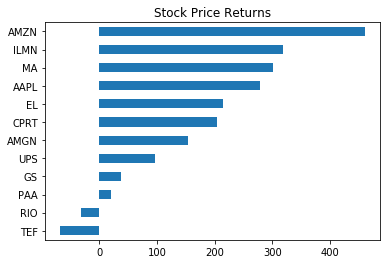

In [17]:

# Plot horizontal bar chart of sorted price_return 
price_return.sort_values().plot(kind='barh', title='Stock Price Returns')  
plt.show()

tickers new

In [42]:
listings.head()

,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
Stock Symbol,,,,,,
ACU,Acme United Corporation.,27.3900,9.113899e+07,1988.0,Capital Goods,Industrial Machinery/Components
AAU,"Almaden Minerals, Ltd.",1.7200,1.548917e+08,2015.0,Basic Industries,Precious Metals
USAS,Americas Silver Corporation,3.0500,1.206948e+08,2017.0,Basic Industries,Precious Metals
AINC,Ashford Inc.,57.3373,1.155508e+08,2014.0,Consumer Services,Professional Services
AUXO,"Auxilio, Inc.",6.3043,5.913104e+07,2017.0,Miscellaneous,Business Services


In [45]:
tickers

['SIM', 'LBY', 'ROX', 'GSAT', 'MPO', 'SEB', 'CRHM', 'AUXO', 'CQP', 'MJCO']

In [50]:
components = listings.loc[tickers][['Market Capitalization','Last Sale']]

In [51]:
components.head()

,Market Capitalization,Last Sale
Stock Symbol,,
SIM,2.123559e+09,12.80
LBY,3.026988e+08,13.82
ROX,2.376444e+08,1.46
GSAT,1.931551e+09,1.73
MPO,4.794015e+08,19.18


In [53]:
no_shares = components['Market Capitalization'].div(components['Last Sale'])

In [55]:
print(no_shares)

Stock Symbol
SIM     1.659031e+08
LBY     2.190295e+07
ROX     1.627702e+08
GSAT    1.116503e+09
MPO     2.499487e+07
SEB     1.170550e+06
CRHM    7.274594e+07
AUXO    9.379477e+06
CQP     3.378264e+08
MJCO    3.649803e+07
dtype: float64


In [62]:
components['Number of Shares'] = no_shares

In [63]:
market_cap = stock_prices.mul(no_shares)

In [64]:
first_value = market_cap.iloc[0]
last_value = market_cap.iloc[-1]

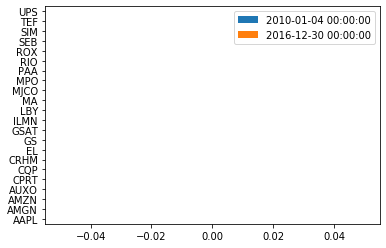

In [65]:
pd.concat([first_value, last_value], axis = 1).plot(kind='barh')